In [1]:
import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot

with open('crg123.csv','rb') as data:
    features = pd.read_csv(data)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

#shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")


(0.06, ' seconds elapsed')


(0.26, ' seconds elapsed')
[[80  0]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.99      0.99        74

   micro avg       0.99      0.99      0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

('Accuracy:', 0.9935064935064936)


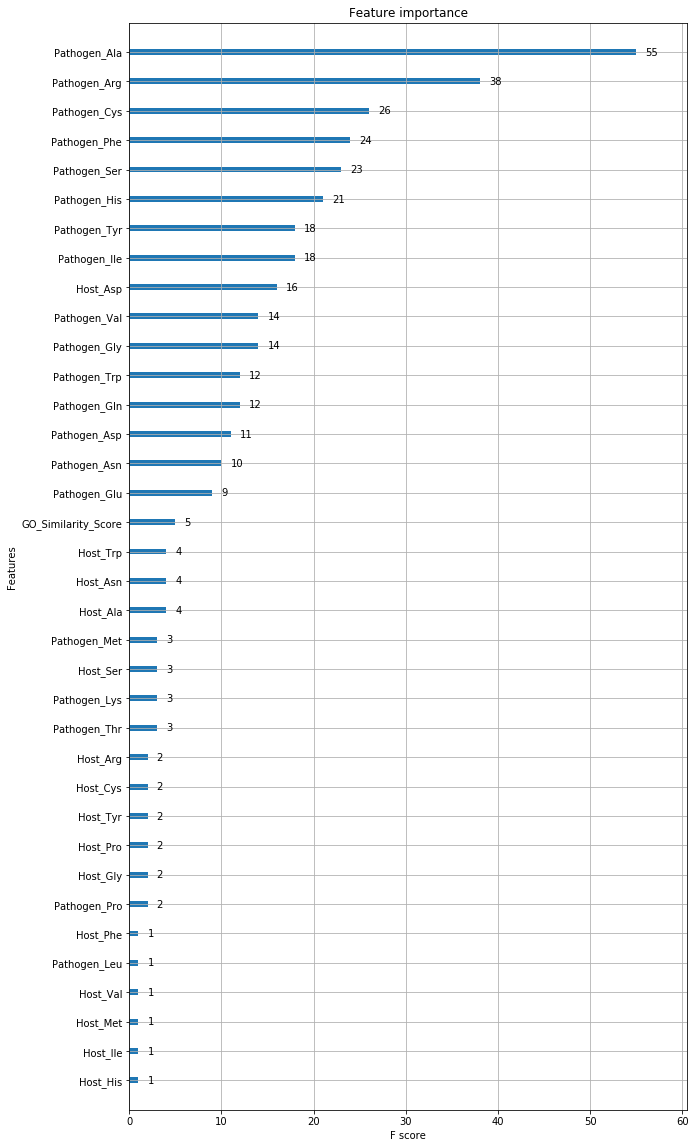

In [2]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

(0.45, ' seconds elapsed')
[[80  0]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.99      0.99        74

   micro avg       0.99      0.99      0.99       154
   macro avg       0.99      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

('Accuracy:', 0.9935064935064936)


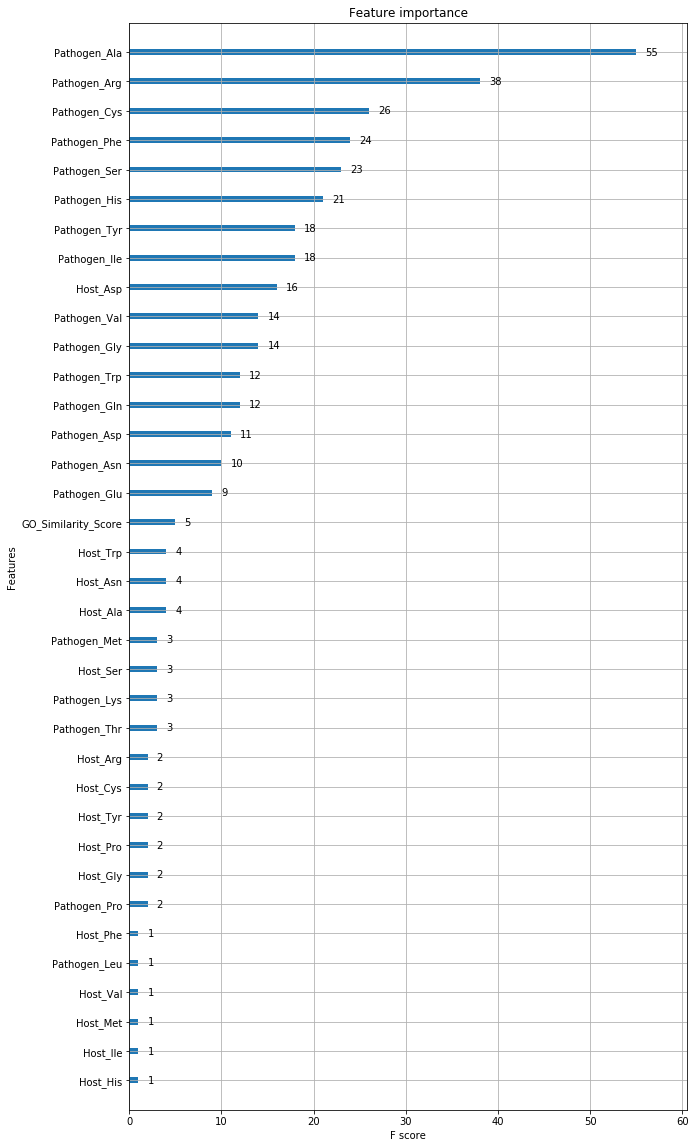

In [7]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 500
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [6]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 1000 decision trees  
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size


end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))






(3.98, ' seconds elapsed')
[[80  0]
 [ 3 71]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        80
           1       1.00      0.96      0.98        74

   micro avg       0.98      0.98      0.98       154
   macro avg       0.98      0.98      0.98       154
weighted avg       0.98      0.98      0.98       154

('Accuracy:', 0.9805194805194806)
Variable: Pathogen_Phe         Importance: 0.22
Variable: Pathogen_Arg         Importance: 0.21
Variable: Pathogen_Ser         Importance: 0.17
Variable: Pathogen_Val         Importance: 0.09
Variable: Pathogen_Cys         Importance: 0.07
Variable: Pathogen_His         Importance: 0.07
Variable: Pathogen_Gly         Importance: 0.04
Variable: Pathogen_Gln         Importance: 0.02
Variable: Pathogen_Ile         Importance: 0.02
Variable: Pathogen_Leu         Importance: 0.02
Variable: Pathogen_Ala         Importance: 0.01
Variable: Pathogen_Asn         Importance: 0.01
Variable: Pathoge